In [5]:
import skimage.io as skio
from matplotlib import pyplot as plt

In [39]:
img = skio.imread("astronaut.png")

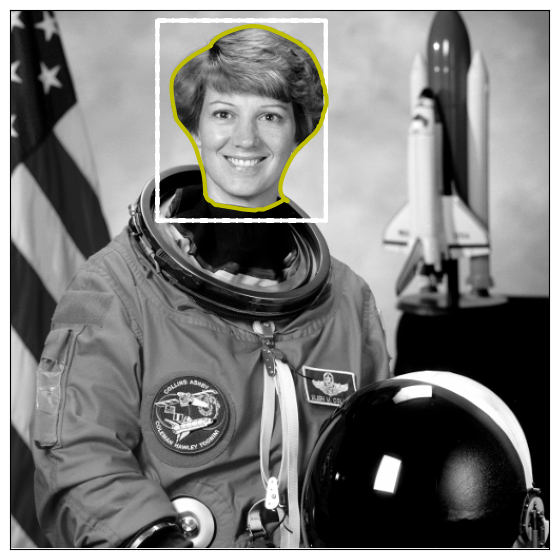

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

initial_contour = np.array([
    [10, 140],
    [200, 140],
    [200, 300],
    [10, 300],
    [10, 140],
])

num_points = 300
x_interp = np.linspace(initial_contour[0, 0], initial_contour[1, 0], num_points)
y_interp = np.linspace(initial_contour[0, 1], initial_contour[1, 1], num_points)
points_between_01 = np.column_stack((x_interp, y_interp))

x_interp = np.linspace(initial_contour[1, 0], initial_contour[2, 0], num_points)
y_interp = np.linspace(initial_contour[1, 1], initial_contour[2, 1], num_points)
points_between_12 = np.column_stack((x_interp, y_interp))

x_interp = np.linspace(initial_contour[2, 0], initial_contour[3, 0], num_points)
y_interp = np.linspace(initial_contour[2, 1], initial_contour[3, 1], num_points)
points_between_23 = np.column_stack((x_interp, y_interp))

x_interp = np.linspace(initial_contour[3, 0], initial_contour[4, 0], num_points)
y_interp = np.linspace(initial_contour[3, 1], initial_contour[4, 1], num_points)
points_between_34 = np.column_stack((x_interp, y_interp))

# Juntar todos os pontos
final_contour = np.vstack([initial_contour, points_between_01, points_between_12, points_between_23, points_between_34])

snake2 = active_contour(gaussian(img, 3, preserve_range=False),
                       final_contour, alpha=0.015, beta=10, gamma=0.001)


fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(final_contour[:, 1], final_contour[:, 0], '--w', lw=3)
ax.plot(snake2[:, 1], snake2[:, 0], '-y', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()